In [107]:
import pandas as pd
import seaborn as sns

# warning 무시
import warnings
warnings.filterwarnings('ignore')

In [114]:
df = pd.read_csv('datasets/NLPRK_STA.csv', sep=',', encoding='cp949')
x=df.drop(columns=['공원명'])
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_df = pd.DataFrame(x_scaled, columns=['육지면적','탐방객수'])

#### 비계층적 군집분석 (K-Means)

In [109]:
# 실루엣 스코어에 따른 최적 군집수 파악
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
n_clusters = [2,3,4,5,6,7,8]
for i in n_clusters:
    kmeans = KMeans(n_clusters = i, random_state = 42).fit(x_df)
    cluster_labels = kmeans.labels_
    S = silhouette_score(x_df, cluster_labels)
    print("n_clusters = {:d}, silhoutte score {:1f}".format(i,S))

n_clusters = 2, silhoutte score 0.432838
n_clusters = 3, silhoutte score 0.545903
n_clusters = 4, silhoutte score 0.557837
n_clusters = 5, silhoutte score 0.506930
n_clusters = 6, silhoutte score 0.490926
n_clusters = 7, silhoutte score 0.533866
n_clusters = 8, silhoutte score 0.452890


실루엣 스코어에 따르면, 군집의 수가 4일 때가 가장 1에 가깝고, 그 다음으로 3이 가까운 것으로 보인다.

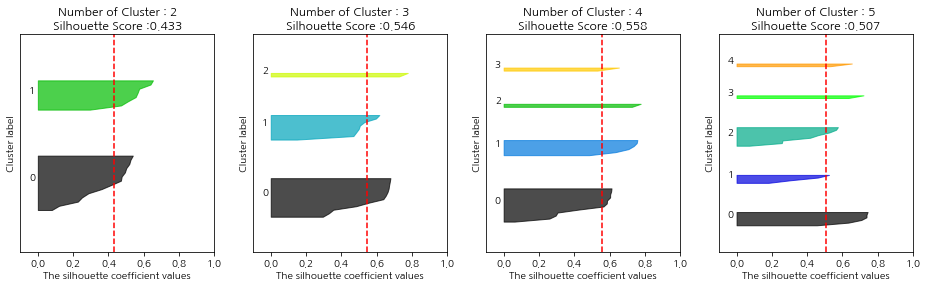

In [110]:
# 각 군집개수에 따른 실루엣 도식화
import numpy as np
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")
visualize_silhouette([2, 3, 4, 5], x_df)

각각의 군집에 따른 실루엣 스코어를 도식화 하여 확인할 수 있다.

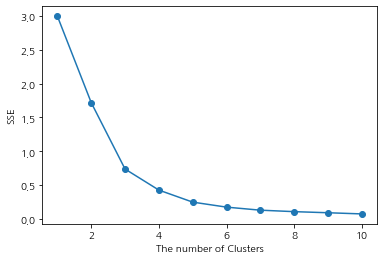

[2.9972341664107103, 1.7186687910582603, 0.7363185681086353, 0.42492855182612316, 0.24690095115974897, 0.17277661174537456, 0.12768680851797515, 0.10592351057516952, 0.08968636173466317, 0.07238172274552736]


In [111]:
# 엘보우 그래프를 통한 최적 군집수 파악
import matplotlib.pyplot as plt
def elbow(x) :
    sse=[]
    for i in range(1,11) :
        kmeans = KMeans(n_clusters = i, random_state = 42)
        kmeans.fit(x)
        sse.append(kmeans.inertia_)
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('The number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)
elbow(x_df)

완만해지는 각도를 보았을 때, 군집의 개수는 3이 가장 최적으로 판단된다. (4도 확인 필요)

In [112]:
from sklearn.metrics import calinski_harabasz_score
# 참고 : 콜린스키하라바츠스코어
for k in range(2,10) :
    kmeans_model = KMeans(n_clusters = k, random_state=42).fit(x_df)
    labels=kmeans_model.labels_
    print(k, calinski_harabasz_score(x_df, labels))

2 14.878554634894853
3 29.17038781059339
4 36.32100884061775
5 47.342531934004846
6 52.31184987149188
7 56.1833166479522
8 54.59242504587681
9 52.680977254677586


콜린스키하라바츠 스코어를 참고하자.

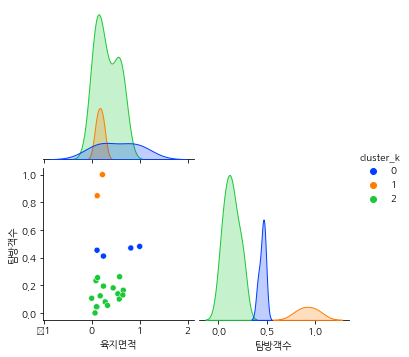

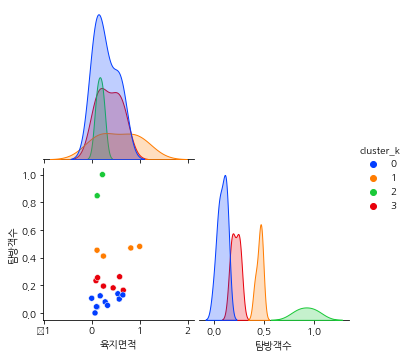

In [113]:
#클러스터 갯수를 4로 정하고, 이에 따른 분포를 산점도로 확인
import seaborn as sns
import matplotlib.pyplot as plt

for k in range (3,5) :
    kmeans_model = KMeans(n_clusters=k).fit(x)
    x_df['cluster_k'] = kmeans_model.labels_
    sns.pairplot(x_df,
                 diag_kind='kde',
                 hue='cluster_k',
                 corner=True,
                 palette='bright')
    plt.show()

시각화 하여 봤을때 군집이 3개와 4개 일 때,    
육지면적에 의한 군집효과는 크지 않으나 탐방객수로 보았을 때, 3개가 더 군집이 잘 된 것으로 보인다.

#### 비계층적 군집분석 (DBSACN)

In [129]:
df = pd.read_csv('datasets/NLPRK_STA.csv', sep=',', encoding='cp949')
x=df.drop(columns=['공원명'])
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_df = pd.DataFrame(x_scaled, columns=['육지면적','탐방객수'])
x_df1=x_df.copy()

In [136]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN() #eps:반경설정, min_sample:최소개체수
cluster_d = dbscan.fit(x_df1)
x_df1['cluster_d'] = dbscan.labels_
#x_df1['silhoutte_coeff']=silhouette_samples(x_df,x_df1['cluster_d'])

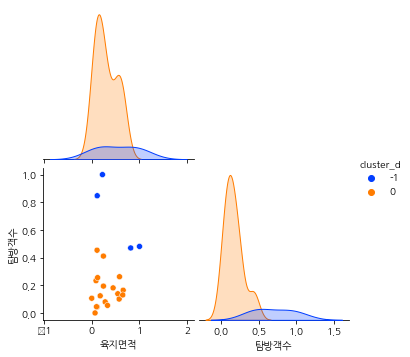

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
#x_df1=x_df1.drop(columns=['silhoutte_coeff'])
sns.pairplot(x_df1,
            diag_kind='kde',
             hue='cluster_d',
             corner=True,
             palette='bright')
plt.show()

반경과 최소개체수를 설정하면 자동으로 군집의 갯수가 정해진다.   
정하지 않을 경우 2개의 군집으로 나눠진다.

#### 계층적 군집분석 ( Hierarchical clsutering)

In [83]:
# 파일불러오기 (생략가능) 
df = pd.read_csv('datasets/NLPRK_STA.csv', sep=',', encoding='cp949')
x=df.drop(columns=['공원명'])
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_df = pd.DataFrame(x_scaled, columns=['육지면적','탐방객수'])

from scipy.cluster.hierarchy import linkage
cluster_h = linkage(x_df, method='average', metric='euclidean')
print(cluster_h[-5:])

[[33.         37.          0.21033642 10.        ]
 [31.         38.          0.34086725 12.        ]
 [34.         39.          0.44539933 18.        ]
 [35.         40.          0.70394348 20.        ]
 [36.         41.          0.80653384 22.        ]]


군집화 일정표의 1~2열은 병합되는 군집번호, 3열은 군집간 거리, 4열은 군집에 속한 개체 수 이다.   
일정표 끝에서 3번째 단계의 군집간 거리가 0.44에서 두번째 단계인 0.70로 증가하여 폭이 크므로 3개로 나누는것이 적절해 보인다.

In [86]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = [2,3,4,5,6,7,8]

for i in n_clusters:
    clus = AgglomerativeClustering(n_clusters = i, linkage = 'average', affinity = 'euclidean')
    cluster_labels = clus.fit_predict(x_df)
    S = metrics.silhouette_score(x_df, cluster_labels)
    print('n_clusters = {:d}, silhoutte score = {:1f}'.format(i,S))

n_clusters = 2, silhoutte score = 0.523617
n_clusters = 3, silhoutte score = 0.505548
n_clusters = 4, silhoutte score = 0.557837
n_clusters = 5, silhoutte score = 0.530773
n_clusters = 6, silhoutte score = 0.474763
n_clusters = 7, silhoutte score = 0.533866
n_clusters = 8, silhoutte score = 0.477979


실루엣 스코어에 따르면, 군집의 수가 4일 때가 가장 1에 가깝고, 그 다음으로 3이 가까운 것으로 보인다.

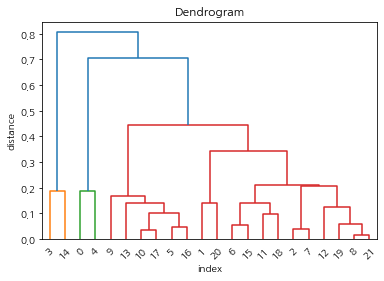

In [87]:
#덴드로그램 그래프 
from scipy.cluster.hierarchy import dendrogram
%matplotlib inline
plt.title('Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
dendrogram(cluster_h)
plt.show()

덴드로그램으로 시각화 하여 봤을때 군집이 3개인 경우 잘 된 것으로 보인다.